# Linear SVM - Diabetes Dataset
The Pima Indians Diabetes dataset contains observations on various health-related attributes, such as plasma glucose concentration, body mass index (BMI) etc. Each row contains a patient's attributes and whether or not he/she had diabetes.

# Data Understanding
Let's first load the data and understand the attributes meanings, shape of the dataset etc.

In [103]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
# load the data
diabetes_train = pd.read_csv("pima_indian_diabetes.csv")
diabetes_train.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
0,1,89,66,23,94,28.1,21,0
1,0,137,40,35,168,43.1,33,1
2,3,78,50,32,88,31.0,26,1
3,2,197,70,45,543,30.5,53,1
4,1,189,60,23,846,30.1,59,1


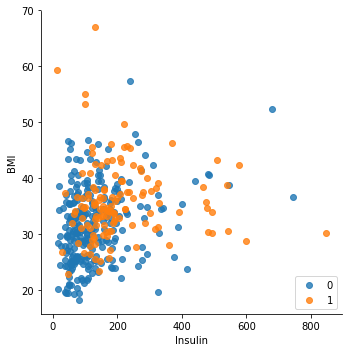

In [105]:
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="Insulin", y="BMI", data=diabetes_train, fit_reg=False, hue='Diabetes', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
#sns.plt.show()


In [106]:
diabetes_train.shape

(392, 8)

In [107]:
diabetes_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
No_Times_Pregnant    392 non-null int64
Plasma_Glucose       392 non-null int64
Diastolic_BP         392 non-null int64
Triceps              392 non-null int64
Insulin              392 non-null int64
BMI                  392 non-null float64
Age                  392 non-null int64
Diabetes             392 non-null int64
dtypes: float64(1), int64(7)
memory usage: 24.6 KB


In [108]:
# there are no missing values in the dataset 
diabetes_train.isnull().sum()

No_Times_Pregnant    0
Plasma_Glucose       0
Diastolic_BP         0
Triceps              0
Insulin              0
BMI                  0
Age                  0
Diabetes             0
dtype: int64

In [109]:
# 33.12% are diabetic in databetic
diabetes_train['Diabetes'].describe()

count    392.000000
mean       0.331633
std        0.471401
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Diabetes, dtype: float64

# Data Preparation
1> Rescaling the features by standardization ((x - x_mean)/std)
2> Test/Train split.

In [110]:
X_train = diabetes_train.drop("Diabetes", axis = 1)
Y_train = diabetes_train.Diabetes.values.astype(int)

In [111]:
# scaling the features
# note that the scale function standardises each column, i.e.
# x = x-mean(x)/std(x)

from sklearn.preprocessing import scale
X_train = scale(X_train)

C:\Users\Debayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [112]:
X_train

array([[-0.7174265 , -1.09104581, -0.37365481, ..., -0.52284201,
        -0.710421  , -0.9682991 ],
       [-1.02921274,  0.46631407, -2.45696436, ...,  0.10063086,
         1.42673006,  0.2095853 ],
       [-0.09385402, -1.44794079, -1.65569146, ..., -0.57339386,
        -0.29723846, -0.47751393],
       ...,
       [-0.40564026, -1.12349081, -1.01467313, ..., -1.18001611,
        -0.66767798, -0.87014206],
       [ 2.08864966, -0.70170584,  0.42761809, ...,  0.20173457,
        -0.02653266,  3.15429628],
       [ 0.52971846, -0.05280589,  0.10710893, ..., -0.37118644,
        -0.9811268 , -0.0848858 ]])

In [113]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 4)

In [114]:
# confirm that splitting also has similar distribution of spam and ham 
# emails
print(y_train.mean())
print(y_test.mean())

0.3248175182481752
0.3474576271186441


# Model Building
Let's build a linear SVM mode now. The SVC() class does that in sklearn. We highly recommend reading the documentation at least once.

In [115]:
model = SVC(C = 1, kernel='linear')

#learn the coefficients from the train set
model.fit(X_train, y_train)

#Apply the coefficients on the test set to predict
y_pred = model.predict(X_test)

In [116]:
help(SVC())

Help on SVC in module sklearn.svm.classes object:

class SVC(sklearn.svm.base.BaseSVC)
 |  SVC(C=1.0, kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to dataset with more than a couple of 10000 samples.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  other, see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |

In [117]:
# Evaluate the model using confusion matrix 
from sklearn import metrics
metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[67, 10],
       [17, 24]], dtype=int64)

In [118]:
# metrics
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.7711864406779662
precision 0.7058823529411765
recall 0.5853658536585366


# K Fold Cross Validation

In [119]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiating a model with cost=1
model = SVC(C = 1)

In [120]:
help(cross_val_score)

Help on function cross_val_score in module sklearn.model_selection._validation:

cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv='warn', n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score='raise-deprecating')
    Evaluate a score by cross-validation
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like
        The data to fit. Can be for example a list, or an array.
    
    y : array-like, optional, default: None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like, with shape (n_samples,), optional
        Group labels for the samples used while splitting the dataset into
        train/test set.
    
    scoring : string, callable or None, optional, default: None
        A string (see model evaluation documentat

In [121]:
# computing the cross-validation scores 
# note that the argument cv takes the 'folds' object, and
# we have specified 'accuracy' as the metric

cv_results = cross_val_score(model, X_train, y_train, cv = folds, scoring = 'accuracy') 

C:\Users\Debayan\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Debayan\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Debayan\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Debayan\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: Fut

In [122]:
# print 5 accuracies obtained from the 5 folds
print(cv_results)
print("mean accuracy = {}".format(cv_results.mean()))

[0.78181818 0.78181818 0.83636364 0.70909091 0.81481481]
mean accuracy = 0.7847811447811448


## Grid Search to Find Optimal Hyperparameter C

In [123]:
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

model = SVC(kernel='linear')

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True)      

In [124]:
# fit the model - it will fit 5 folds across all values of C
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Debayan\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Debayan\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Debayan\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=1)

In [125]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003990,0.003571,0.000997,0.000629,0.1,{'C': 0.1},0.654545,0.745455,0.781818,0.709091,...,0.729927,0.044567,3,0.776256,0.757991,0.767123,0.776256,0.772727,0.770071,0.006902
1,0.001995,0.000633,0.000398,0.000487,1,{'C': 1},0.672727,0.800000,0.763636,0.745455,...,0.762774,0.054289,1,0.849315,0.821918,0.821918,0.835616,0.836364,0.833026,0.010295
2,0.003787,0.000750,0.000598,0.000488,10,{'C': 10},0.709091,0.763636,0.818182,0.745455,...,0.762774,0.036048,1,0.876712,0.881279,0.885845,0.881279,0.881818,0.881386,0.002896
3,0.022539,0.006969,0.000800,0.000750,100,{'C': 100},0.745455,0.745455,0.818182,0.654545,...,0.729927,0.056528,3,0.904110,0.936073,0.926941,0.922374,0.918182,0.921536,0.010547
4,0.137831,0.046062,0.000599,0.000489,1000,{'C': 1000},0.745455,0.690909,0.745455,0.581818,...,0.689781,0.059904,5,0.936073,0.940639,0.940639,0.963470,0.963636,0.948892,0.012087


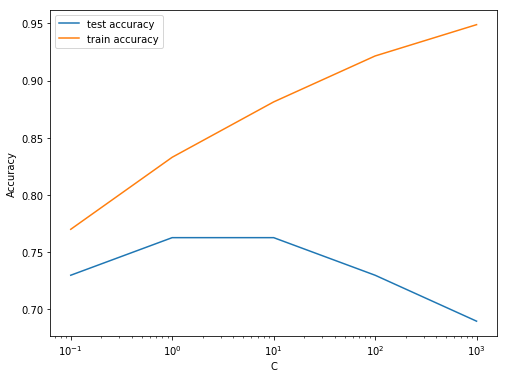

In [126]:
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')